### Objective: To calculate descriptors similar to molecular descriptor paper

### Import some packages. 

In [1]:
import pandas
from pathlib import Path
from Bio.PDB.PDBParser import PDBParser
import pandas as pd
import nglview
import nglview as ngl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sarge import run, capture_both

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
%config InlineBackend.figure_format='retina'

In [2]:
data_path = Path().cwd()#.parent /'developability/data/pdbs'
files = list(data_path.iterdir())

### Look at the PDB file

In [3]:
input_pdb = str(data_path/'abagovomab_forChris.pdb')
parser = PDBParser()

structure = parser.get_structure('abagovomab', input_pdb)
parser.get_header()

{'name': '',
 'head': 'abagovom',
 'idcode': '',
 'deposition_date': '1909-01-08',
 'release_date': '1909-01-08',
 'structure_method': 'unknown',
 'resolution': None,
 'structure_reference': [],
 'journal_reference': '',
 'author': '',
 'compound': {'1': {'misc': ''}},
 'source': {'1': {'misc': ''}},
 'has_missing_residues': False,
 'missing_residues': []}

HEADER                                                        abagovom
REMARK  99                                                                      
REMARK  99 MOE v2022.02 (Chemical Computing Group ULC) Fri Sep 29 15:31:18 2023 
SEQRES   1 L  107  ASP ILE GLU LEU THR GLN SER PRO ALA SER LEU SER ALA
SEQRES   2 L  107  SER VAL GLY GLU THR VAL THR ILE THR CYS GLN ALA SER
SEQRES   3 L  107  GLU ASN ILE TYR SER TYR LEU ALA TRP HIS GLN GLN LYS
SEQRES   4 L  107  GLN GLY LYS SER PRO GLN LEU LEU VAL TYR ASN ALA LYS
SEQRES   5 L  107  THR LEU ALA GLY GLY VAL SER SER ARG PHE SER GLY SER
SEQRES   6 L  107  GLY SER GLY THR HIS PHE SER LEU LYS ILE LYS SER LEU
SEQRES   7 L  107  GLN PRO GLU ASP PHE GLY ILE TYR TYR CYS GLN HIS HIS
SEQRES   8 L  107  TYR GLY ILE LEU PRO THR PHE GLY GLY GLY THR LYS LEU
SEQRES   9 L  107  GLU ILE LYS
SEQRES   1 H  119  GLN VAL LYS LEU GLN GLU SER GLY ALA GLU LEU ALA ARG
SEQRES   2 H  119  PRO GLY ALA SER VAL LYS LEU SER CYS LYS ALA SER GLY
SEQRES   3 H  119  TYR THR

In [5]:

view = nglview.show_structure_file(input_pdb)
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget()

### Run pdb4amber to get the system ready. 

In [6]:
from biobb_amber.pdb4amber.pdb4amber_run import pdb4amber_run

# create the output
output_pdb4amber_path = str(data_path/'structure.pdb4amber.pdb')

# properties
props = {'remove_hydrogens': True}

#create and launch bb
pdb4amber_run(input_pdb_path=input_pdb,
              output_pdb_path=output_pdb4amber_path, 
              properties = props
             );


2023-10-04 22:33:38,440 [MainThread  ] [INFO ]  Executing biobb_amber.pdb4amber.pdb4amber_run Version: 4.1.0
2023-10-04 22:33:38,442 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/abagovomab_forChris.pdb to /Users/ChristopherRivera/Projects/developability/Notebooks/9e665fb0-9468-45ed-bdcb-2831abe1b44d
2023-10-04 22:33:38,442 [MainThread  ] [INFO ]  Creating 8d849fc7-6152-4974-9c81-f592957c56dd temporary folder
2023-10-04 22:33:38,443 [MainThread  ] [INFO ]  pdb4amber -i /Users/ChristopherRivera/Projects/developability/Notebooks/9e665fb0-9468-45ed-bdcb-2831abe1b44d/abagovomab_forChris.pdb -o /Users/ChristopherRivera/Projects/developability/Notebooks/9e665fb0-9468-45ed-bdcb-2831abe1b44d/structure.pdb4amber.pdb -y 

2023-10-04 22:33:39,122 [MainThread  ] [INFO ]  Exit code 0

2023-10-04 22:33:39,124 [MainThread  ] [INFO ]  
Summary of pdb4amber for: /Users/ChristopherRivera/Projects/developability/Notebooks/9e665fb0-9468-45ed-bdcb-2831abe1b44d/aba

In [7]:
# Import module
from biobb_amber.leap.leap_gen_top import leap_gen_top

# Create prop dict and inputs/outputs
output_pdb_path = str(data_path/'structure.leap.pdb')
output_top_path = str(data_path/'structure.leap.top')
output_crd_path = str(data_path/'structure.leap.crd')

prop = {
    "forcefield" : ["protein.ff19SB"]
}

# Create and launch bb
leap_gen_top(input_pdb_path=output_pdb4amber_path,
           #input_pdb_path=downloaded_pdb,
           output_pdb_path=output_pdb_path,
           output_top_path=output_top_path,
           output_crd_path=output_crd_path,
           properties=prop)

2023-10-04 22:33:39,140 [MainThread  ] [INFO ]  Executing biobb_amber.leap.leap_gen_top Version: 4.1.0
2023-10-04 22:33:39,142 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/structure.pdb4amber.pdb to /Users/ChristopherRivera/Projects/developability/Notebooks/ca25bc7d-1c55-4748-b561-6183d7d20cc9
2023-10-04 22:33:39,143 [MainThread  ] [INFO ]  Creating 866aad86-f953-4d64-8ab5-4d01ce27402f temporary folder
2023-10-04 22:33:39,144 [MainThread  ] [INFO ]  tleap -f 866aad86-f953-4d64-8ab5-4d01ce27402f/leap.in

2023-10-04 22:33:39,513 [MainThread  ] [INFO ]  Exit code 0

2023-10-04 22:33:39,514 [MainThread  ] [INFO ]  -I: Adding /Users/ChristopherRivera/micromamba/envs/surface/dat/leap/prep to search path.
-I: Adding /Users/ChristopherRivera/micromamba/envs/surface/dat/leap/lib to search path.
-I: Adding /Users/ChristopherRivera/micromamba/envs/surface/dat/leap/parm to search path.
-I: Adding /Users/ChristopherRivera/micromamba/envs/surface/dat/leap/

0

In [8]:
view = nglview.show_structure_file(output_pdb_path)
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','600px'])

view

NGLWidget()

### Energy Minimization
### Minimize the hydrogens
This places a position restraint on the protein heavy atoms. 

In [9]:
# Import module
from biobb_amber.sander.sander_mdrun import sander_mdrun

# Create prop dict and inputs/outputs
output_h_min_traj_path = str(data_path/'sander.h_min.x')
output_h_min_rst_path = str(data_path/'sander.h_min.rst')
output_h_min_log_path = str(data_path/'sander.h_min.log')

prop = {
    'simulation_type' : "min_vacuo",
    "mdin" : { 
        'maxcyc' : 500,
        'ntpr' : 5,
        'ntr' : 1,
        'restraintmask' : '\":*&!@H=\"',
        'restraint_wt' : 50.0
    }
}

# Create and launch bb
sander_mdrun(input_top_path=output_top_path,
            input_crd_path=output_crd_path,
            input_ref_path=output_crd_path,
            output_traj_path=output_h_min_traj_path,
            output_rst_path=output_h_min_rst_path,
            output_log_path=output_h_min_log_path,
            properties=prop)

2023-10-04 22:33:39,547 [MainThread  ] [INFO ]  Executing biobb_amber.sander.sander_mdrun Version: 4.1.0
2023-10-04 22:33:39,550 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/structure.leap.top to /Users/ChristopherRivera/Projects/developability/Notebooks/1fd08dc9-fbea-4f25-95a5-607e9274d29a
2023-10-04 22:33:39,551 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/structure.leap.crd to /Users/ChristopherRivera/Projects/developability/Notebooks/1fd08dc9-fbea-4f25-95a5-607e9274d29a
2023-10-04 22:33:39,552 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/structure.leap.crd to /Users/ChristopherRivera/Projects/developability/Notebooks/1fd08dc9-fbea-4f25-95a5-607e9274d29a
2023-10-04 22:33:39,553 [MainThread  ] [INFO ]  Creating aa7f39c9-30f8-4f34-aaf2-270d6bf1f5f5 temporary folder
2023-10-04 22:33:39,554 [MainThread  ] [INFO ]  sander -O -i aa7f39c9-30f8-4f34-aaf2-270d6b

/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/biobb_common/tools/file_utils.py:753: UserWarning: Path /Users/ChristopherRivera/Projects/developability/Notebooks/sander.h_min.x --- biobb_amber.sander.sander_mdrun: Unexisting output_traj_path file.
  warnings.warn(not_found_error_string)


0

In [10]:
# Import module
from biobb_amber.process.process_minout import process_minout

# Create prop dict and inputs/outputs
output_h_min_dat_path = 'sander.h_min.energy.dat'

prop = {
    "terms" : ['ENERGY']
}

# Create and launch bb
process_minout(input_log_path=output_h_min_log_path,
            output_dat_path=output_h_min_dat_path,
            properties=prop)

2023-10-04 22:33:44,583 [MainThread  ] [INFO ]  Executing biobb_amber.process.process_minout Version: 4.1.0
2023-10-04 22:33:44,585 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/sander.h_min.log to /Users/ChristopherRivera/Projects/developability/Notebooks/d62e8ffa-dd25-402a-9701-3f6e395b2a5b
2023-10-04 22:33:44,586 [MainThread  ] [INFO ]  Creating 1d028bd6-c0ad-42a5-803f-29819c90bad1 temporary folder
2023-10-04 22:33:44,588 [MainThread  ] [INFO ]  cd 1d028bd6-c0ad-42a5-803f-29819c90bad1 ; process_minout.perl /Users/ChristopherRivera/Projects/developability/Notebooks/d62e8ffa-dd25-402a-9701-3f6e395b2a5b/sander.h_min.log

2023-10-04 22:33:44,656 [MainThread  ] [INFO ]  Exit code 0

2023-10-04 22:33:44,657 [MainThread  ] [INFO ]  Processing sander output file (/Users/ChristopherRivera/Projects/developability/Notebooks/d62e8ffa-dd25-402a-9701-3f6e395b2a5b/sander.h_min.log)...
Processing step 50 of a possible 500...
Processing step 100 of a possib

0

<Axes: xlabel='Iteration'>

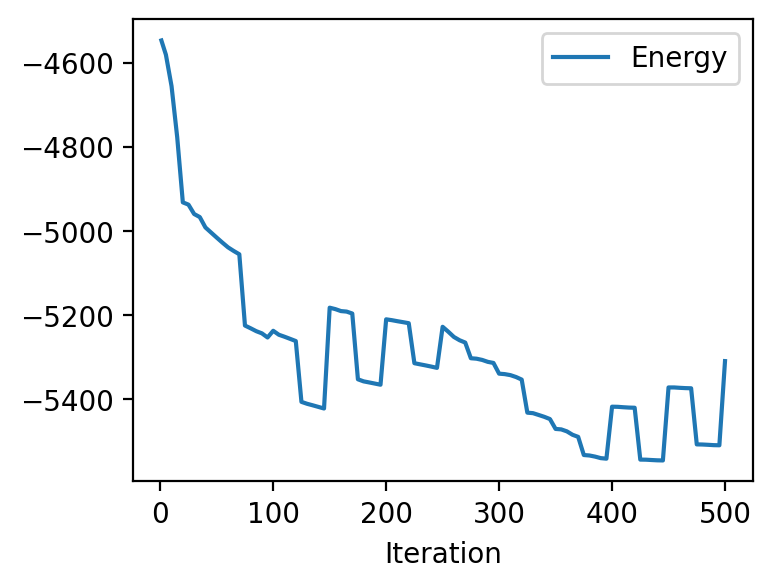

In [11]:
#Read data from file and filter energy values higher than 1000 Kj/mol^-1
file = Path(output_h_min_dat_path)
df = pd.read_csv(file, delim_whitespace= True, header = None, names = ['Iteration', 'Energy'])
df=df.query('Energy<=1000')

df.plot(x = "Iteration", figsize = (4, 3))


### Minimize the engergy of the system 
System minimization, applying position restraints (50 Kcal/mol.Å2) to the protein heavy atoms.

In [12]:
# Import module
from biobb_amber.sander.sander_mdrun import sander_mdrun

# Create prop dict and inputs/outputs
output_n_min_traj_path = 'sander.n_min.x'
output_n_min_rst_path = 'sander.n_min.rst'
output_n_min_log_path = 'sander.n_min.log'

prop = {
    'simulation_type' : "min_vacuo",
    "mdin" : { 
        'maxcyc' : 500,
        'ntpr' : 5,
        'ntr' : 1,
        'restraintmask' : '\":*&!@H=\"',
        'restraint_wt' : 50.0
    }
}

# Create and launch bb
sander_mdrun(input_top_path=output_top_path,
            input_crd_path=output_h_min_rst_path,
            input_ref_path=output_h_min_rst_path,
            output_traj_path=output_n_min_traj_path,
            output_rst_path=output_n_min_rst_path,
            output_log_path=output_n_min_log_path,
            properties=prop)

2023-10-04 22:33:44,781 [MainThread  ] [INFO ]  Executing biobb_amber.sander.sander_mdrun Version: 4.1.0
2023-10-04 22:33:44,784 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/structure.leap.top to /Users/ChristopherRivera/Projects/developability/Notebooks/5e454b8a-5925-4ad4-ac8f-00ebcadcc4e6
2023-10-04 22:33:44,786 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/sander.h_min.rst to /Users/ChristopherRivera/Projects/developability/Notebooks/5e454b8a-5925-4ad4-ac8f-00ebcadcc4e6
2023-10-04 22:33:44,787 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/sander.h_min.rst to /Users/ChristopherRivera/Projects/developability/Notebooks/5e454b8a-5925-4ad4-ac8f-00ebcadcc4e6
2023-10-04 22:33:44,788 [MainThread  ] [INFO ]  Creating 6ecbd38b-9418-42ae-b8e2-21692cfb6cc3 temporary folder
2023-10-04 22:33:44,790 [MainThread  ] [INFO ]  sander -O -i 6ecbd38b-9418-42ae-b8e2-21692cfb6c

/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/biobb_common/tools/file_utils.py:771: UserWarning: biobb_amber.sander.sander_mdrun input_crd_path: /Users/ChristopherRivera/Projects/developability/Notebooks/sander.h_min.rst extension is not in the valid extensions list: ['crd', 'mdcrd', 'inpcrd', 'netcdf', 'nc', 'ncrst']. If you want to suppress this message, please set the check_extensions property to False
  warnings.warn(not_valid_extension_error_string)


2023-10-04 22:33:49,755 [MainThread  ] [INFO ]  Exit code 0

2023-10-04 22:33:49,758 [MainThread  ] [INFO ]  Removed: ['/Users/ChristopherRivera/Projects/developability/Notebooks/5e454b8a-5925-4ad4-ac8f-00ebcadcc4e6', 'mdinfo', '6ecbd38b-9418-42ae-b8e2-21692cfb6cc3']
2023-10-04 22:33:49,759 [MainThread  ] [INFO ]  Path sander.n_min.x --- biobb_amber.sander.sander_mdrun: Unexisting output_traj_path file.


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/biobb_common/tools/file_utils.py:753: UserWarning: Path sander.n_min.x --- biobb_amber.sander.sander_mdrun: Unexisting output_traj_path file.
  warnings.warn(not_found_error_string)


0

### Checking Energy Minimization results
Checking energy minimization results. Plotting potential energy by time during the minimization process.

In [13]:
# Import module
from biobb_amber.process.process_minout import process_minout

# Create prop dict and inputs/outputs
output_n_min_dat_path = 'sander.n_min.energy.dat'

prop = {
    "terms" : ['ENERGY']
}

# Create and launch bb
process_minout(input_log_path=output_n_min_log_path,
            output_dat_path=output_n_min_dat_path,
            properties=prop)

2023-10-04 22:33:49,769 [MainThread  ] [INFO ]  Executing biobb_amber.process.process_minout Version: 4.1.0
2023-10-04 22:33:49,771 [MainThread  ] [INFO ]  Copy: sander.n_min.log to /Users/ChristopherRivera/Projects/developability/Notebooks/96dc1f53-f516-46f0-9151-4b201a617db6
2023-10-04 22:33:49,772 [MainThread  ] [INFO ]  Creating 0e47bfde-5959-4c55-b9fa-1243c15f3d63 temporary folder
2023-10-04 22:33:49,773 [MainThread  ] [INFO ]  cd 0e47bfde-5959-4c55-b9fa-1243c15f3d63 ; process_minout.perl /Users/ChristopherRivera/Projects/developability/Notebooks/96dc1f53-f516-46f0-9151-4b201a617db6/sander.n_min.log

2023-10-04 22:33:49,818 [MainThread  ] [INFO ]  Exit code 0

2023-10-04 22:33:49,820 [MainThread  ] [INFO ]  Processing sander output file (/Users/ChristopherRivera/Projects/developability/Notebooks/96dc1f53-f516-46f0-9151-4b201a617db6/sander.n_min.log)...
Processing step 50 of a possible 500...
Processing step 100 of a possible 500...
Processing step 150 of a possible 500...
Processi

0

<Axes: xlabel='Iteration'>

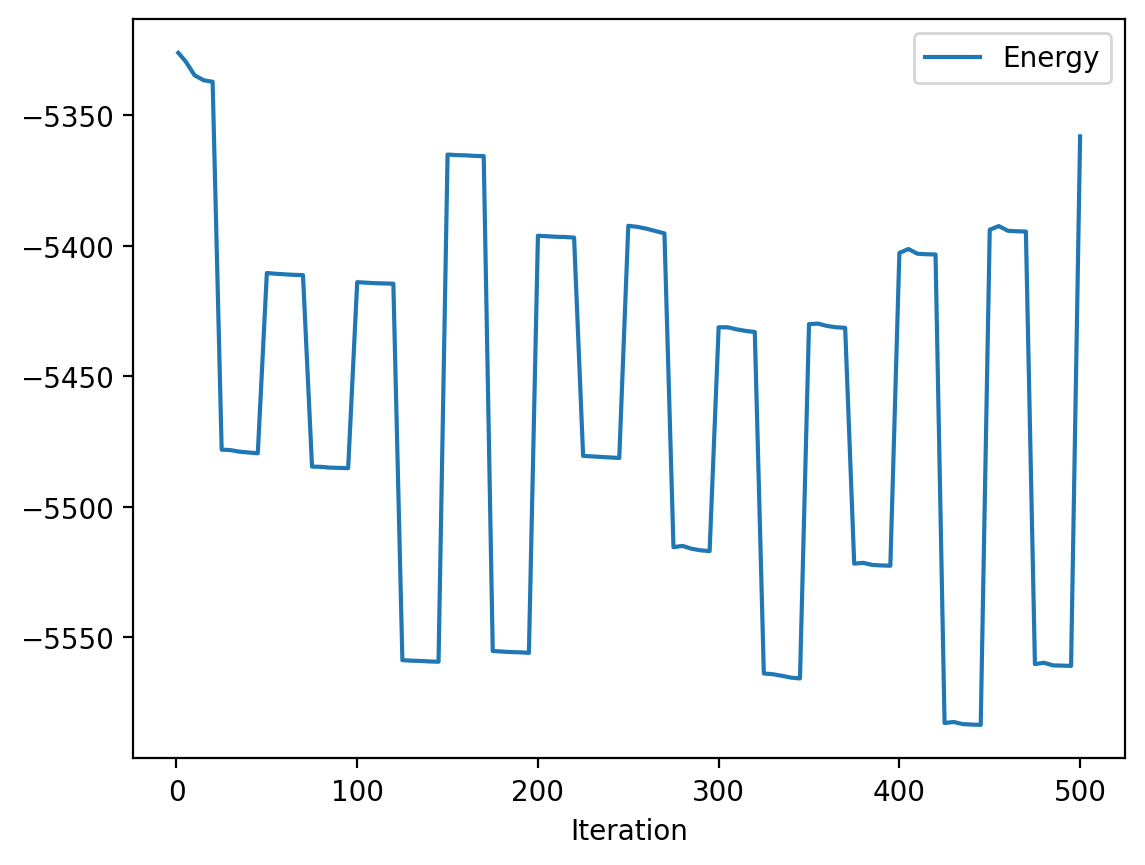

In [14]:
file = Path(output_n_min_dat_path)
df = pd.read_csv(file, delim_whitespace= True, header = None, names = ['Iteration', 'Energy'])
df.plot(x='Iteration')


### Convert amber to pdb. 

In [15]:
# Import module
from biobb_amber.ambpdb.amber_to_pdb import amber_to_pdb

# Create prop dict and inputs/outputs
output_ambpdb_path = 'structure.ambpdb.pdb'

# Create and launch bb
amber_to_pdb(input_top_path=output_top_path,
            input_crd_path=output_h_min_rst_path,
            output_pdb_path=output_ambpdb_path
            )

2023-10-04 22:33:49,937 [MainThread  ] [INFO ]  Executing biobb_amber.ambpdb.amber_to_pdb Version: 4.1.0
2023-10-04 22:33:49,939 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/structure.leap.top to /Users/ChristopherRivera/Projects/developability/Notebooks/866ea5eb-fa83-443a-afd7-f65bfdd7fcde
2023-10-04 22:33:49,940 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Projects/developability/Notebooks/sander.h_min.rst to /Users/ChristopherRivera/Projects/developability/Notebooks/866ea5eb-fa83-443a-afd7-f65bfdd7fcde
2023-10-04 22:33:49,941 [MainThread  ] [INFO ]  ambpdb -p /Users/ChristopherRivera/Projects/developability/Notebooks/866ea5eb-fa83-443a-afd7-f65bfdd7fcde/structure.leap.top -c /Users/ChristopherRivera/Projects/developability/Notebooks/866ea5eb-fa83-443a-afd7-f65bfdd7fcde/sander.h_min.rst >  /Users/ChristopherRivera/Projects/developability/Notebooks/866ea5eb-fa83-443a-afd7-f65bfdd7fcde/structure.ambpdb.pdb

2023-10-04 22:33:50,032 [

0

In [16]:
view = nglview.show_structure_file(output_ambpdb_path)
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget()

In [17]:
def run_pb2pqr(input_pdb, options=None, save_log=True): 
    if not options:
        options = {'ff' : 'AMBER', 
                   'with-ph': 7.0, 
                   'titration-state-method': 'propka', 
                   'drop-water':'', 
                   'apbs-input':Path(input_pdb).with_suffix('.ini'), 
                  }

    output_pqr = Path(input_pdb).with_suffix('.pqr')

    cmd = [f'pdb2pqr']
    for option, value in options.items(): 
        if value: 
            cmd.append(f'--{option}={value}')
        else: 
            cmd.append(f'--{option}')
    cmd = ' '.join(cmd)
    cmd = f'{cmd} {input_pdb} {output_pqr}'

    res =  capture_both(cmd).stderr
    res = bytes_to_str(res)

    if save_log: 
        Path(input_pdb).with_suffix('.pdb2pqr.log').write_text(res)
    return res
        
    
def bytes_to_str(byte_list): 
    return ''.join([str(b, encoding='utf-8') for b in byte_list])
                   

def run_apbs(input_ini, output_file=None, save_log=True): 
    if not output_file:
        output_file = Path(input_ini).with_suffix('.pqr.log')
    
    cmd = f'apbs --output-file={output_file} {input_ini}'
    
    res = capture_both(cmd).stderr
    res = bytes_to_str(res)
    return res
        


In [18]:
test = Path(output_ambpdb_path)
cmd = run_pb2pqr(test)

In [19]:
ini = test.with_suffix('.ini')
pqr = test.with_suffix('.pqr')

run_apbs(ini)

' Writing data to flat file structure.ambpdb.pqr.log...\n\n'

### Files for reading

In [20]:
def read_pqr(file): 
    """ reads a pqr file in as a dataframe
    Args: 
        file(Path|str): 
    Returns
        pandas DataFrame
    """
    names = ['Field_name','Atom_number','Atom_name','Residue_name','Residue_number','X','Y','Z','Charge','Radius']
    df = pd.read_csv(file, delim_whitespace=True, header = None,names = names)
    return df

    
def pqr_to_xyzr(file, output_path = None): 
    """ convert pqr file to pqrz format. for use in nanoshaper
    Args: 
        file(Path|str): 
    Returns
        pandas DataFrame
    """

    if not output_path: 
        output_path = Path(file).with_suffix('.xyzr')

    pqr = read_pqr(file)
    cols  = ['X', 'Y', 'Z', 'Radius']
    xyzr = pqr.loc[pqr['Field_name']=='ATOM'][cols]

    xyzr.to_csv(output_path, sep =' ', index = False, header = False)
    return xyzr


def read_xyzr(file): 
    """ reads a xyzr file in as a dataframe
    Args: 
        file(Path|str): 
    Returns
        pandas DataFrame
    """
    names  = ['X', 'Y', 'Z', 'Radius']
    df = pd.read_csv(file, delim_whitespace=True, header = None,names = names)
    return df
    
    


In [21]:
pqr_df =read_pqr(pqr)
xyzr_df = pqr_to_xyzr(pqr)

### Nanoshaper

In [22]:
def run_nanoshaper(pem_file='', save_log=True): 
    """Run nanoshaper"""
    cmd = f"NanoShaper {pem_file}"

    log = capture_both(cmd).stdout
    log = bytes_to_str(log)
    
    if save_log:  
        output = Path(pem_file).parent/ 'NanoShaper.log'
        output.write_text(log)

    return log
    

In [23]:
log = run_nanoshaper('conf.prm')

### Use multivalue to get the nearest points. 

To do this, we first need to extract the coordinates from the OFF file. 

In [24]:
def extract_xyz_atoms_from_off(off): 
    """extracts the xyz coordinates from the given off file."""
    text = Path(off).read_text().split('\n')
    n_vertices = int(text[3].split()[0])

    # read in the desired rows
    df = pd.read_csv(off, skiprows = 4, nrows = n_vertices,
                    header = None, names = ['x', 'y', 'z', 'atom'],
                     delim_whitespace=True )
    return df


def save_off_xyz_to_csv(off): 
    """ Save the xyz columns from off file to csv
    Args: 
        off(Path/str): path to the file 
    Returns: 
        None
    """
    off = Path(off)
    df = extract_xyz_atoms_from_off(off)
    df.to_csv(off.with_suffix('.csv'), header = False, index =False, columns = ['x','y','z'])
    return None

def save_off_xyz_atoms_to_csv(off): 
    """ Save the xyz and atom columns from off file to csv
    Args: 
        off(Path/str): path to the file 
    Returns: 
        None
    """

    off = Path(off)
    df = extract_xyz_atoms_from_off(off)
    
    df.to_csv(off.with_suffix('.atom.csv'), index =False, columns=['x', 'y', 'z','atom'])
    return None

    
def read_text(file): 
    """Reads a text file"""
    return Path(file).read_text()


def run_multiview(coordinates, dx, multiview_path = None, output = None): 
    """executes multivalue to obtain potential for desired coordinates from dx file
    Args: 
        coordinates(Path/str): path to coordinate csv file
        dx(Path/str): path to dx file with electrostatics from ABS
        mulitiview_path(Path/str): path to directory with multiview binary
    Returns: 
        None
    """

    if not multiview_path:  
        multivalue_path = Path('/Users/ChristopherRivera/bioprograms/APBS-3.4.1.Darwin/share/apbs/tools/bin')
    
    multivalue = multivalue_path/'multivalue'

    if not output:
        output = 'ESPCoord.csv'

    cmd = f"{multivalue} {coordinates} {dx} {output}"

    capture_both(cmd)

    return None

In [25]:
off = 'triangulatedSurf.off'
text = extract_xyz_atoms_from_off(off)
save_off_xyz_to_csv(off)

In [26]:
coordinates = 'triangulatedSurf.csv'
pd.read_csv(coordinates,header=None)

,0,1,2
0,1.062,-31.691,0.329
1,3.914,-31.775,0.340
2,0.687,-31.651,0.801
3,4.883,-31.689,0.809
4,0.588,-31.688,1.205
...,...,...,...
52725,7.202,-7.019,20.777
52726,7.185,-1.436,20.773
52727,7.147,0.916,20.855
52728,7.727,-0.517,20.710


In [27]:
dx ='structure.ambpdb.pqr.dx'
cmd=run_multiview(coordinates, dx, multiview_path = None)

### Compare the data files for next step

In [28]:
save_off_xyz_atoms_to_csv(off)

In [29]:
coordinate_pot = pd.read_csv('ESPCoord.csv',  
                             header=None, 
                             names = ['x','y','z', 'pot'])
coordinate_atoms = pd.read_csv('triangulatedSurf.atom.csv')
pqr_df = read_pqr(pqr)

In [30]:
coordinate_pot.head()

,x,y,z,pot
0,1.062,-31.691,0.329,10.995320
1,3.914,-31.775,0.340,6.835957
2,0.687,-31.651,0.801,5.943833
3,4.883,-31.689,0.809,4.194274
4,0.588,-31.688,1.205,6.534518


In [31]:
coordinate_atoms.head()

,x,y,z,atom
0,1.062,-31.691,0.329,1598
1,3.914,-31.775,0.340,1597
2,0.687,-31.651,0.801,1598
3,4.883,-31.689,0.809,1610
4,0.588,-31.688,1.205,1598


In [32]:
pqr_df.head(100)

,Field_name,Atom_number,Atom_name,Residue_name,Residue_number,X,Y,Z,Charge,Radius
0,ATOM,1.0,N,ASP,1.0,7.554,7.170,14.868,0.0782,1.8240
1,ATOM,2.0,CA,ASP,1.0,6.965,6.440,13.726,0.0292,1.9080
2,ATOM,3.0,CB,ASP,1.0,7.711,6.720,12.406,-0.0235,1.9080
3,ATOM,4.0,CG,ASP,1.0,7.805,8.217,12.071,0.8194,1.9080
4,ATOM,5.0,OD1,ASP,1.0,7.406,9.025,12.946,-0.8084,1.6612
5,ATOM,6.0,OD2,ASP,1.0,8.248,8.531,10.954,-0.8084,1.6612
6,ATOM,7.0,C,ASP,1.0,6.925,4.965,14.081,0.5621,1.9080
7,ATOM,8.0,O,ASP,1.0,7.851,4.500,14.736,-0.5889,1.6612
8,ATOM,9.0,H,ASP,1.0,6.849,7.336,15.556,0.2200,0.6000
9,ATOM,10.0,HA,ASP,1.0,6.025,6.753,13.638,0.1141,1.1000


In [33]:
#demonstrate same length
len(coordinate_pot)==len(coordinate_atoms)

True

In [34]:
#demonstrate same coordinates
(coordinate_pot[['x','y','z']]==coordinate_atoms[['x','y','z']]).mean()


x    1.0
y    1.0
z    1.0
dtype: float64

In [35]:
# confirm that number of atoms is the same as max atom number
pqr_df['Atom_number'].max()==len(pqr_df['Atom_number'].dropna())

True

In [36]:
# confirm that max atom number is equal to or less than max atom number
pqr_df.Atom_number.max()>=coordinate_atoms.atom.max()+1

True

In [37]:
pqr_df.Atom_number.max(), coordinate_atoms.atom.max()+1

(3409.0, 3408)

In [38]:
pqr_df.Atom_number.min(), coordinate_atoms.atom.min()+1

(1.0, 1)

### Merge the triangulatedSurf with the extracted potentials. 

In [39]:
def sum_pot_for_atoms(coordinate_pot=None, coordinate_atoms=None): 
    """ sums up the potentials per atom
    TODO consider breaking up. 
    
    """

    def num_positive(x): 
        return (x>=0).sum()

    def percent_positive(x): 
        return (x>=0).mean()
    
    if not coordinate_pot: 
        coordinate_pot = 'ESPCoord.csv'

    if not coordinate_atoms:
        coordinate_atoms = 'triangulatedSurf.atom.csv'
        
    pot_df = pd.read_csv(coordinate_pot, 
                         header=None, 
                         names = ['x','y','z', 'pot'])
    atoms_df = pd.read_csv(coordinate_atoms)
    pot_atoms_df = (pot_df.merge(atoms_df)
                    .sort_values('atom')
                    .reset_index(drop=True)
                   )
    #Nanoshaper uses numbering starting at zero. 
    pot_atoms_df['atom']+=1
    res =  (pot_atoms_df.groupby('atom')['pot']
            .agg([len, 'sum', 'mean',num_positive, percent_positive ])
            .reset_index())
    return res.rename({'len':'number', 'sum':'total_pot', 'mean':'mean_pot', 'atom':'Atom_number'}, axis = 1)



def map_esp_to_atoms(pqr, coordinate_pot=None, coordinate_atoms=None, path = None): 
    """Map Electric Surface Potential to atoms on PQR file
    Args: 
        pqr(Path/str): path to pqr file
        coordinate_pot(Path/str): path to the cooridate file with esp
        coordinate_atoms(Path/str): Path to to the coordinate with atoms. 
    Returns: 
        pqr_df(pd.DataFrame)
    """
    pqr_df = read_pqr(pqr)
    atom_pot_df = sum_pot_for_atoms(coordinate_pot, coordinate_atoms)

    return pqr_df.merge(atom_pot_df, how='left')
  

In [40]:
atom_pot_df = map_esp_to_atoms(pqr)
atom_pot_df.head()

,Field_name,Atom_number,Atom_name,Residue_name,Residue_number,X,Y,Z,Charge,Radius,number,total_pot,mean_pot,num_positive,percent_positive
0,ATOM,1.0,N,ASP,1.0,7.554,7.170,14.868,0.0782,1.8240,130.0,1557.268716,11.978990,130.0,1.000000
1,ATOM,2.0,CA,ASP,1.0,6.965,6.440,13.726,0.0292,1.9080,12.0,150.471872,12.539323,12.0,1.000000
2,ATOM,3.0,CB,ASP,1.0,7.711,6.720,12.406,-0.0235,1.9080,11.0,-2.538323,-0.230757,6.0,0.545455
3,ATOM,4.0,CG,ASP,1.0,7.805,8.217,12.071,0.8194,1.9080,23.0,-58.434177,-2.540616,9.0,0.391304
4,ATOM,5.0,OD1,ASP,1.0,7.406,9.025,12.946,-0.8084,1.6612,82.0,-486.766086,-5.936172,12.0,0.146341


### Function to aggregate potential over residues. 

In [41]:
def sum_pot_over_residues(atom_pot_df): 
    """ Given a dataframe with the potentials summed per atoms, sums up over residues
    Args: 
        atom_pot_df(pd.DataFrame): 
    Returns: 
        residue_pot_df(pd.DataFrame)
    """
    ##DRY (I will refactor this later in actual repo). 
    
    def num_positive(x): 
        return (x>=0).sum()

    def percent_positive(x): 
        return (x>=0).mean()
    
    residue_pot_df = (atom_pot_df.groupby(['Residue_number','Residue_name'])
           ['total_pot']
            .agg([len, 'sum', 'mean',num_positive, percent_positive ])
            .reset_index()
          )
    return residue_pot_df.rename({'len':'number_atoms', 'sum':'total_pot', 'mean':'mean_pot', 'atom':'Atom_number'}
                                 , axis = 1)


In [42]:
residue_pot_df = sum_pot_over_residues(atom_pot_df)
pd.DataFrame(np.round(residue_pot_df.groupby('Residue_name')['total_pot'].median()).sort_values()).transpose()

Residue_name,GLU,ASP,MET,LEU,CYX,VAL,ILE,ALA,HIE,TRP,SER,GLY,PHE,GLN,PRO,THR,TYR,ASN,LYS,ARG
total_pot,-881.0,-253.0,0.0,0.0,0.0,34.0,70.0,72.0,152.0,194.0,227.0,240.0,317.0,354.0,359.0,394.0,640.0,873.0,2500.0,2683.0


In [43]:
residue_pot_df.head()

,Residue_number,Residue_name,number_atoms,total_pot,mean_pot,num_positive,percent_positive
0,1.0,ASP,14,653.659570,59.423597,6,0.428571
1,2.0,ILE,19,183.324909,20.369434,4,0.210526
2,3.0,GLU,15,-2515.674449,-179.691032,6,0.400000
3,4.0,LEU,19,-22.238116,-4.447623,3,0.157895
4,5.0,THR,14,324.900262,27.075022,9,0.642857


/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ChristopherRivera/micromamba/envs/surface/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


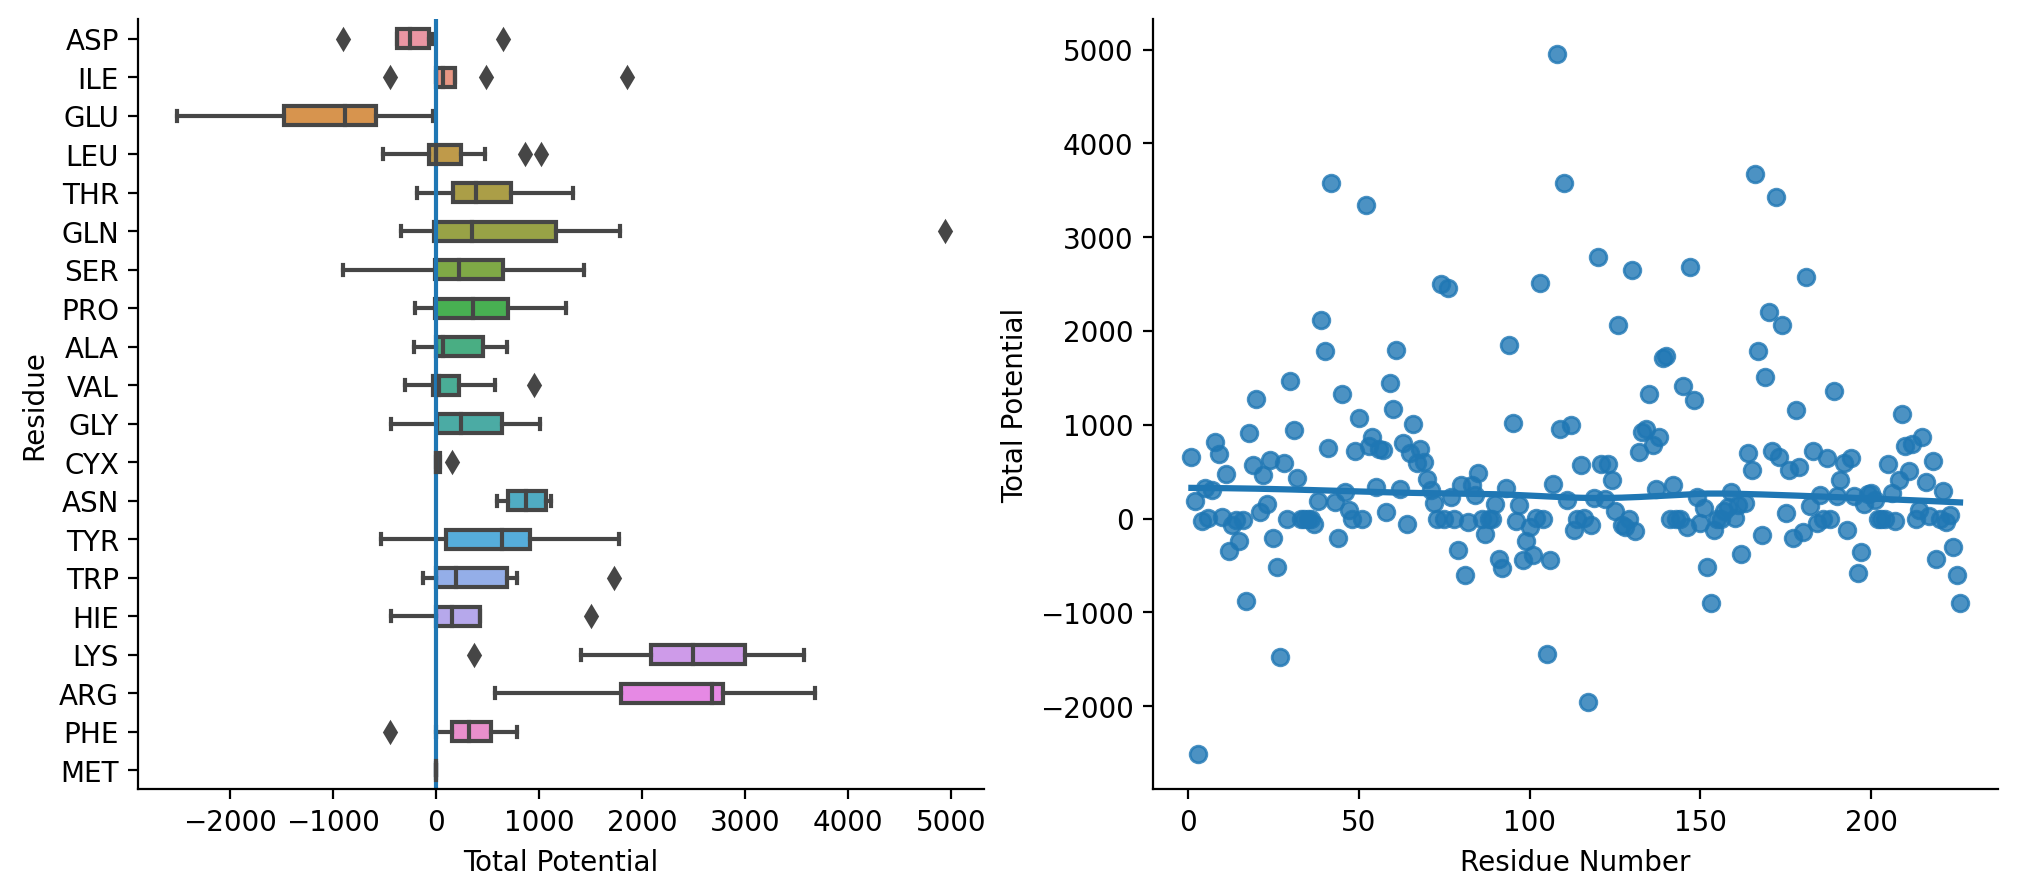

In [44]:
fix, axes = plt.subplots(1,2, figsize = (12,5))
ax = sns.boxplot(data =residue_pot_df, y='Residue_name', x= 'total_pot', ax = axes[0], width = 0.5);
ax.axvline(0)
ax.set(xlabel ='Total Potential', ylabel = 'Residue')


ax = sns.regplot(residue_pot_df, x = 'Residue_number', y = 'total_pot', lowess=True, ax = axes[1])
ax.set(ylabel ='Total Potential', xlabel = 'Residue Number')
sns.despine()

In [45]:
residue_pot_df.head()

,Residue_number,Residue_name,number_atoms,total_pot,mean_pot,num_positive,percent_positive
0,1.0,ASP,14,653.659570,59.423597,6,0.428571
1,2.0,ILE,19,183.324909,20.369434,4,0.210526
2,3.0,GLU,15,-2515.674449,-179.691032,6,0.400000
3,4.0,LEU,19,-22.238116,-4.447623,3,0.157895
4,5.0,THR,14,324.900262,27.075022,9,0.642857


## Using Anarci and Abnumber to annotate the chains. 
Below are the light and heavy chains of the Fc region of Abagovomab.

[I took them from here.](https://opig.stats.ox.ac.uk/webapps/sabdab-sabpred/therasabdab/therasummary/?INN=abagovomab&format=Whole+mAb&clintrial=Phase-III&status=Discontinued&target=MUC16/CA125&yearprop=2006&isotype=G1&heavy1=QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS&light1=DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQLLVYNAKTLAGGVSSRFSGSGSGTHFSLKIKSLQPEDFGIYYCQHHYGILPTFGGGTKLEIK&heavy2=na&light2=na&struc100=None&struc99=None&struc95to98=None&yearrec=2007&companies=Menarini&cond_approved=na&cond_active=na&cond_disc=Ovarian+cancer;Pancreatic+cancer+&dev_tech=&notes=&genetics=&alt_names=#metadata)

In [46]:
hc = """QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS"""

In [47]:
lc = """DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQLLVYNAKTLAGGVSSRFSGSGSGTHFSLKIKSLQPEDFGIYYCQHHYGILPTFGGGTKLEIK"""

In [48]:
from abnumber import Chain

In [49]:
heavy_chain = Chain(hc, scheme='kabat')
light_chain = Chain(lc, scheme='kabat')

### Functions to extract charge features. 
This function will take in the following: 

1. Results from charge annotation.
2. Light chain and heavy chain sequences.
3. Annotate features. 


We also need to get the heavy chain and light chain. 

In [50]:
from Bio.Data.IUPACData import protein_letters_3to1, protein_letters_1to3


def map3to1(residues):
    """ uses dict to map proteins 3 letter code  to 1 letter code
    Args: 
        residues(list): list of 1 code residues
    Returns
        three_code(list)
    """

    #TODO: Handle noncanonical residues

    return [protein_letters_3to1.get(aa.capitalize(), '') for aa in residues]


def chain_to_df(chain): 
    """Converts a chain from Abnumber to dataframe for merging"""
    
    regions = chain.regions
    
    region_list = []
    residues = []
    
    for reg in regions: 
        aminos = regions[reg]
        for aa in aminos.items():
            region_list.append(reg)
            residues.append(aa[1])
                            
    regions_df= pd.DataFrame(dict(Residue=residues, 
                             Region = region_list, 
                             Residue_number=range(1, len(region_list)+1)
                            )
                       )
    if chain.chain_type=="H": 
        
        chain_type = "H" 
    else: 
        chain_type ="L"
    
    regions_df['Chain']=chain_type
    return regions_df


def map_region_to_ab_seq(heavy_chain_seq, light_chain_seq,residue_pot_df, scheme='kabat'):
    """Uses Abnumber to annoate residues of sequence and maps to residue potential dataframe
    Args:
        heavy_chain_seq(str): the heavy chain sequence
        light_chain_seq(str): the light chain sequence
        residue_pot_df(pd.DataFrame): the data frame with summed potential per residue. 
        scheme(str): the CDR annotation scheme to use
    Returns: 
        pd.DataFrame
    """

    # Use Abnumber to identify CDR regions for both light and heavy chain and merge into a single dataframe 
    heavy_chain = Chain(hc, scheme=scheme)
    light_chain = Chain(lc, scheme=scheme)

    heavy_regions = chain_to_df(heavy_chain)
    light_regions = chain_to_df(light_chain)

    both_regions = pd.concat([ light_regions,heavy_regions])
    both_regions['Residue_number']=range(1, len(both_regions)+1)

    # combine with potential data
    one_code = map3to1(residue_pot_df['Residue_name'])
    residue_pot_df.insert(2,'Residue' , one_code)
    residue_pot_df = residue_pot_df.merge(both_regions, how = 'left', on=['Residue', 'Residue_number'])
    return residue_pot_df

In [51]:
residue_pot_df=map_region_to_ab_seq(hc, lc, residue_pot_df)

In [52]:
residue_pot_df.head()

,Residue_number,Residue_name,Residue,number_atoms,total_pot,mean_pot,num_positive,percent_positive,Region,Chain
0,1.0,ASP,D,14,653.659570,59.423597,6,0.428571,FR1,L
1,2.0,ILE,I,19,183.324909,20.369434,4,0.210526,FR1,L
2,3.0,GLU,E,15,-2515.674449,-179.691032,6,0.400000,FR1,L
3,4.0,LEU,L,19,-22.238116,-4.447623,3,0.157895,FR1,L
4,5.0,THR,T,14,324.900262,27.075022,9,0.642857,FR1,L


In [53]:
residue_pot_df['residue_1']= map3to1(residue_pot_df['Residue_name'].values)
residue_pot_df.head()

,Residue_number,Residue_name,Residue,number_atoms,total_pot,mean_pot,num_positive,percent_positive,Region,Chain,residue_1
0,1.0,ASP,D,14,653.659570,59.423597,6,0.428571,FR1,L,D
1,2.0,ILE,I,19,183.324909,20.369434,4,0.210526,FR1,L,I
2,3.0,GLU,E,15,-2515.674449,-179.691032,6,0.400000,FR1,L,E
3,4.0,LEU,L,19,-22.238116,-4.447623,3,0.157895,FR1,L,L
4,5.0,THR,T,14,324.900262,27.075022,9,0.642857,FR1,L,T


### Functions to calculate descriptors

In [54]:
def name(func): 
    """ returns the name of a func"""
    return func.__name__


def cdr_potentials(residue_pot_df): 
    """calculates the potentials for cdrs
    TODO: Refactor into function. 
    TODO: Add 
    """
    
    cdrs = ['CDR1', 'CDR2', 'CDR3', 'FR1', 'FR2', 'FR3', 'FR4', 'FR5']
    chains = ['H', 'L']

    # calculate for cdrs
    pos_df =  residue_pot_df.loc[residue_pot_df['total_pot']>=0]
    neg_df =  residue_pot_df.loc[residue_pot_df['total_pot']<0]
    
    vals = {f'{chain}{cdr}_APBS_pos':pos_df.query("Region==@cdr & Chain==@chain")['total_pot'].sum() 
            for cdr in cdrs for chain in chains}
    
    vals.update({f'{chain}{cdr}_APBS_neg':neg_df.query("Region==@cdr & Chain==@chain")['total_pot'].sum() 
            for cdr in cdrs for chain in chains}
               )
    
    #calculate net potential per cdr
    vals.update( {f'{chain}{cdr}_APBS_net':residue_pot_df.query("Region==@cdr & Chain==@chain")['total_pot'].sum() 
            for cdr in cdrs for chain in chains})
    
    # total positive and negative charge
    vals['CDR_APBS_pos']= pos_df.loc[pos_df.Region.isin(cdrs)]['total_pot'].sum()
    vals['CDR_APBS_neg']= neg_df.loc[neg_df.Region.isin(cdrs)]['total_pot'].sum()
    vals['CDR_APBS_net']= residue_pot_df.loc[residue_pot_df.Region.isin(cdrs)]['total_pot'].sum()
    
    return pd.DataFrame.from_dict(vals, orient='index').transpose()

In [55]:
cdr_potentials(residue_pot_df)

,HCDR1_APBS_pos,LCDR1_APBS_pos,HCDR2_APBS_pos,LCDR2_APBS_pos,HCDR3_APBS_pos,LCDR3_APBS_pos,HFR1_APBS_pos,LFR1_APBS_pos,HFR2_APBS_pos,LFR2_APBS_pos,HFR3_APBS_pos,LFR3_APBS_pos,HFR4_APBS_pos,LFR4_APBS_pos,HFR5_APBS_pos,LFR5_APBS_pos,HCDR1_APBS_neg,LCDR1_APBS_neg,HCDR2_APBS_neg,LCDR2_APBS_neg,HCDR3_APBS_neg,LCDR3_APBS_neg,HFR1_APBS_neg,LFR1_APBS_neg,HFR2_APBS_neg,LFR2_APBS_neg,HFR3_APBS_neg,LFR3_APBS_neg,HFR4_APBS_neg,LFR4_APBS_neg,HFR5_APBS_neg,LFR5_APBS_neg,HCDR1_APBS_net,LCDR1_APBS_net,HCDR2_APBS_net,LCDR2_APBS_net,HCDR3_APBS_net,LCDR3_APBS_net,HFR1_APBS_net,LFR1_APBS_net,HFR2_APBS_net,LFR2_APBS_net,HFR3_APBS_net,LFR3_APBS_net,HFR4_APBS_net,LFR4_APBS_net,HFR5_APBS_net,LFR5_APBS_net,CDR_APBS_pos,CDR_APBS_neg,CDR_APBS_net
0,4667.72959,4047.435983,14477.822005,7126.723376,4823.076251,3339.401914,25841.218444,6780.586398,5697.499416,11008.562288,13631.860924,17084.751928,1361.745887,2886.949041,0.0,0.0,0.0,-2202.505507,-561.935248,0.0,-24.116191,-557.047093,-2447.570619,-4104.985113,-1683.024593,-260.143363,-1462.713728,-1212.246047,-2278.724272,-3053.847309,0.0,0.0,4667.72959,1844.930476,13915.886757,7126.723376,4798.96006,2782.354821,23393.647825,2675.601285,4014.474823,10748.418926,12169.147196,15872.505881,-916.978385,-166.898268,0.0,0.0,122775.363446,-19848.859083,102926.504363


In [56]:
def calculate_descriptors(residue_pot_df, features = None): 
    """Calculates features from resdiue_potential dataframe
    Args: 
        residue_pot_df (pd.DataFrame)
        features(list): list of funcs for getting features. 
    Returns
        features_df (pd.DataFrame)
    """
    if not features: 
        features= [cdr_potentials]

    feat_dict= {}
    
    for feat in features:
        feat_dict.update(feat(residue_pot_df))
    return feat_dict



### Parse the original PDB to get the chains. 


from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()

s = parser.get_structure('ab', input_pdb)
h, l = list(s.get_chains())
len(list(h.get_residues())) + len(list(l.get_residues()))